# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Merry Febyanti
- **Email:** merryfebyanti@gmail.com
- **ID Dicoding:** merryfeby

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh hari kerja terhadap jumlah sewa sepeda dalam harian?
- Bagaimana pengaruh kondisi cuaca terhadap jumlah sewa sepeda dalam harian?




## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import streamlit as st

## Data Wrangling

### Gathering Data

In [2]:
day_data = pd.read_csv('main_data.csv')
pd.set_option('display.max_columns', None)
day_data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'main_data.csv'

**Insight:**
- xxx
- xxx

### Assessing Data

In [ ]:
# Menganalisis dataset harian dan menampilkan informasi penting
# Jenis data dari setiap kolom dalam dataset
day_data_dtypes = day_data.dtypes
print("Jenis data setiap kolom:\n", day_data_dtypes)

# Statistik deskriptif untuk setiap kolom
day_data_describe = day_data.describe(include='all')
print("\nStatistik deskriptif:\n", day_data_describe)

# Jumlah nilai null untuk setiap kolom
day_data_missing_values = day_data.isnull().sum()
print("\nJumlah nilai null:\n", day_data_missing_values)

# Jumlah baris duplikat dalam dataset
day_duplicates = day_data.duplicated().sum()
print("\nJumlah duplikat:", day_duplicates)

Jenis data setiap kolom:
 instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Statistik deskriptif:
            instant      dteday      season          yr        mnth  \
count   731.000000         731  731.000000  731.000000  731.000000   
unique         NaN         731         NaN         NaN         NaN   
top            NaN  2011-01-01         NaN         NaN         NaN   
freq           NaN           1         NaN         NaN         NaN   
mean    366.000000         NaN    2.496580    0.500684    6.519836   
std     211.165812         NaN    1.110807    0.500342    3.451913   
min       1.000000         NaN    1.000000    0.000000    1.000000   
25%     183.500000      

**Insight:**
- Musim mempengaruhi penggunaan sepeda sharing
- Hari kerja memiliki tingkat penggunaan sepeda sharing yang lebih tinggi

### Cleaning Data

In [15]:
# Ubah tipe data dteday menjadi datetime
day_data['dteday'] = pd.to_datetime(day_data['dteday'])

# Periksa kembali jenis data dteday
print("Jenis data dteday: ", day_data['dteday'].dtype)

# Ambil kolom yang relevan
relevant_columns = ['weathersit', 'workingday']
day_data_clean = day_data[relevant_columns]

#Konversi Tipe Data untuk Kolom Kategori
# Mapping kondisi cuaca 'weathersit' menjadi string
weather_map = {
    1: 'Sunny',
    2: 'Cloudy',
    3: 'Rain',
    4: 'Heavy Rain'
}
day_data['weathersit_label'] = day_data['weathersit'].map(weather_map).astype(str)

# Mapping hari kerja 'workingday' menjadi string
day_data['workingday_label'] = day_data['workingday'].map({
    0: 'Non-Working Day',
    1: 'Working Day'
}).astype(str)

# Menampilkan data setelah perubahan tipe data dan mapping
print(day_data[['dteday', 'weathersit', 'weathersit_label', 'workingday', 'workingday_label']].head())

Jenis data dteday:  datetime64[ns]
      dteday  weathersit weathersit_label  workingday workingday_label
0 2011-01-01           2           Cloudy           0  Non-Working Day
1 2011-01-02           2           Cloudy           0  Non-Working Day
2 2011-01-03           1            Sunny           1      Working Day
3 2011-01-04           1            Sunny           1      Working Day
4 2011-01-05           1            Sunny           1      Working Day


**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...


Statistik Sewa Sepeda berdasarkan Kondisi Cuaca:
                         mean  median          std
weathersit_label                                  
Cloudy            4035.862348  4040.0  1809.109918
Rain              1803.285714  1817.0  1240.284449
Sunny             4876.786177  4844.0  1879.483989


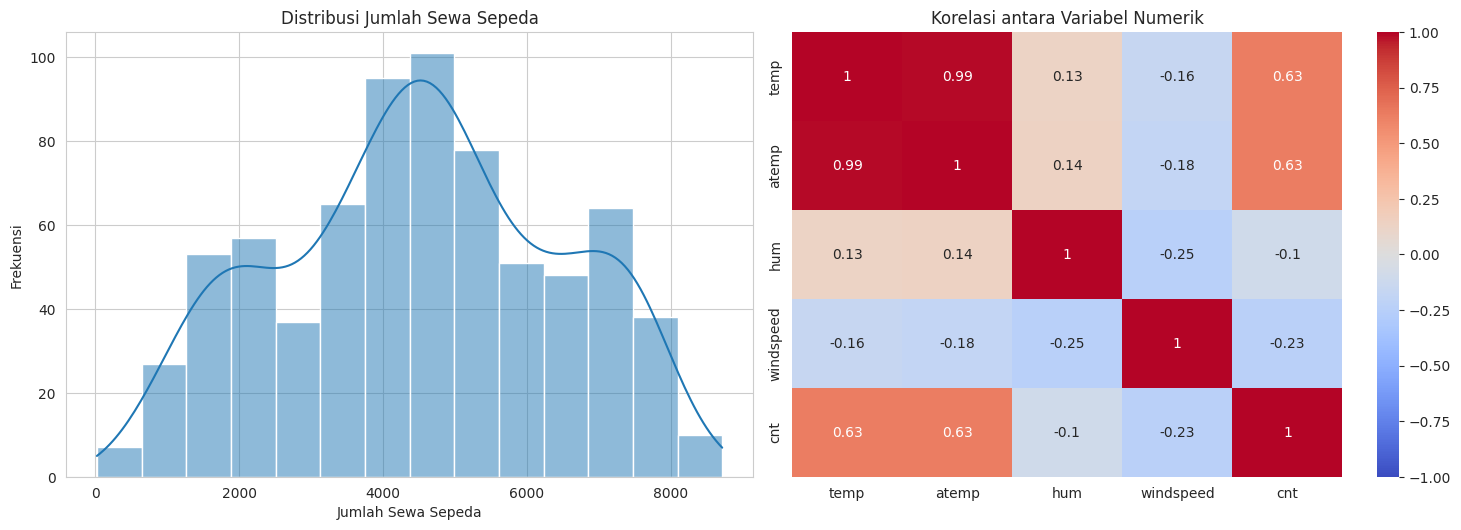


Statistik Deskriptif Jumlah Sewa Sepeda:
count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64


In [34]:
# Mengatur style seaborn untuk plot yang lebih menarik
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))

# Analisis statistik untuk kondisi cuaca
weather_stats = day_data.groupby('weathersit_label')['cnt'].agg(['mean', 'median', 'std'])
print("\nStatistik Sewa Sepeda berdasarkan Kondisi Cuaca:")
print(weather_stats)

# Distribusi jumlah sewa sepeda
plt.subplot(2, 2, 3)
sns.histplot(day_data['cnt'], kde=True)
plt.title('Distribusi Jumlah Sewa Sepeda')
plt.xlabel('Jumlah Sewa Sepeda')
plt.ylabel('Frekuensi')

# Korelasi antara variabel numerik
plt.subplot(2, 2, 4)
numeric_columns = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
correlation_matrix = day_data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Korelasi antara Variabel Numerik')

plt.tight_layout()
plt.show()

# Analisis statistik deskriptif
print("\nStatistik Deskriptif Jumlah Sewa Sepeda:")
print(day_data['cnt'].describe())


**Insight:**
-  Cuaca Cerah (Sunny) memiliki rata-rata jumlah sewa sepeda tertinggi, yaitu sekitar 4,876 sewa, dengan median yang juga mendekati nilai rata-rata ini. Ini menunjukkan bahwa cuaca yang baik cenderung meningkatkan penggunaan sepeda.

- Cuaca Hujan (Rain) memiliki rata-rata jumlah sewa sepeda yang paling rendah, hanya sekitar 1,803 sewa, dengan standar deviasi yang lebih kecil dibandingkan kondisi cuaca lainnya. Ini menunjukkan bahwa hujan secara signifikan mengurangi jumlah penggunaan sepeda, dan distribusi jumlah sewa cenderung lebih seragam di kondisi ini.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Text(0, 0.5, 'Jumlah Sewa Sepeda')

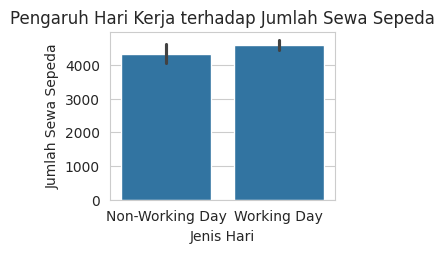

In [35]:
# 1. Pengaruh hari kerja terhadap jumlah sewa sepeda
plt.subplot(2, 2, 1)
sns.barplot(x='workingday_label', y='cnt', data=day_data)
plt.title('Pengaruh Hari Kerja terhadap Jumlah Sewa Sepeda')
plt.xlabel('Jenis Hari')
plt.ylabel('Jumlah Sewa Sepeda')

### Pertanyaan 2:

([0, 1, 2], [Text(0, 0, 'Cloudy'), Text(1, 0, 'Sunny'), Text(2, 0, 'Rain')])

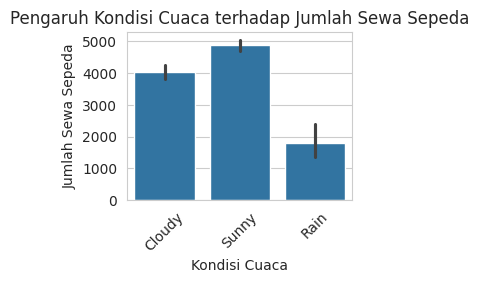

In [38]:
# 2. Pengaruh kondisi cuaca terhadap jumlah sewa sepeda
plt.subplot(2, 2, 2)
sns.barplot(x='weathersit_label', y='cnt', data=day_data)
plt.title('Pengaruh Kondisi Cuaca terhadap Jumlah Sewa Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Sewa Sepeda')
plt.xticks(rotation=45)

**Insight:**
- Berdasarkan visualisasi dan analisis statistik, terdapat perbedaan yang signifikan dalam jumlah sewa sepeda antara hari kerja dan hari libur, rata-rata jumlah sewa sepeda pada hari kerja lebih tinggi dibandingkan dengan hari libur
- Jumlah sewa sepeda cenderung lebih tinggi pada hari cerah (Sunny) dan berawan (Cloudy)

## Analisis Lanjutan (Opsional)

## Conclusion

- Analisis menunjukkan bahwa jumlah sewa sepeda cenderung lebih tinggi pada hari kerja dibandingkan dengan hari non-kerja. Hal ini mengindikasikan bahwa sepeda lebih banyak digunakan untuk keperluan mobilitas di hari kerja, seperti perjalanan menuju tempat kerja atau kegiatan lainnya.
- Berdasarkan statistik sewa sepeda menurut kondisi cuaca, cuaca cerah (Sunny) memiliki jumlah sewa tertinggi, diikuti oleh cuaca berawan (Cloudy), dan yang terendah adalah saat hujan (Rain). Ini menunjukkan bahwa kondisi cuaca yang baik berkontribusi positif terhadap penggunaan sepeda, sedangkan hujan cenderung mengurangi jumlah sewa sepeda.